# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [8]:
vaccines.df = read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')
vaccines.df |> head() 

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# create the df_vacc_rates here

df_vacc_rates = vaccines.df |> 
    filter (mmr >= 0) |> 
    group_by(state) |> 
    summarize (total_vax = n(), 
            ninetyfive_vax = sum(mmr >= 95, na.rm = TRUE),
            fraction_above_ninetyfive = ninetyfive_vax/total_vax) |> 
    arrange(fraction_above_ninetyfive)

df_vacc_rates

state,total_vax,ninetyfive_vax,fraction_above_ninetyfive
<chr>,<int>,<int>,<dbl>
Arkansas,567,2,0.003527337
Washington,1978,646,0.326592518
North Dakota,360,164,0.455555556
Maine,357,169,0.473389356
Minnesota,1593,755,0.473948525
Ohio,2919,1435,0.491606715
Arizona,1171,593,0.506404782
Oregon,806,478,0.593052109
Colorado,1507,939,0.623092236


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

Arkansas is the state with the smallest fraction of schools above the CDC target. 

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

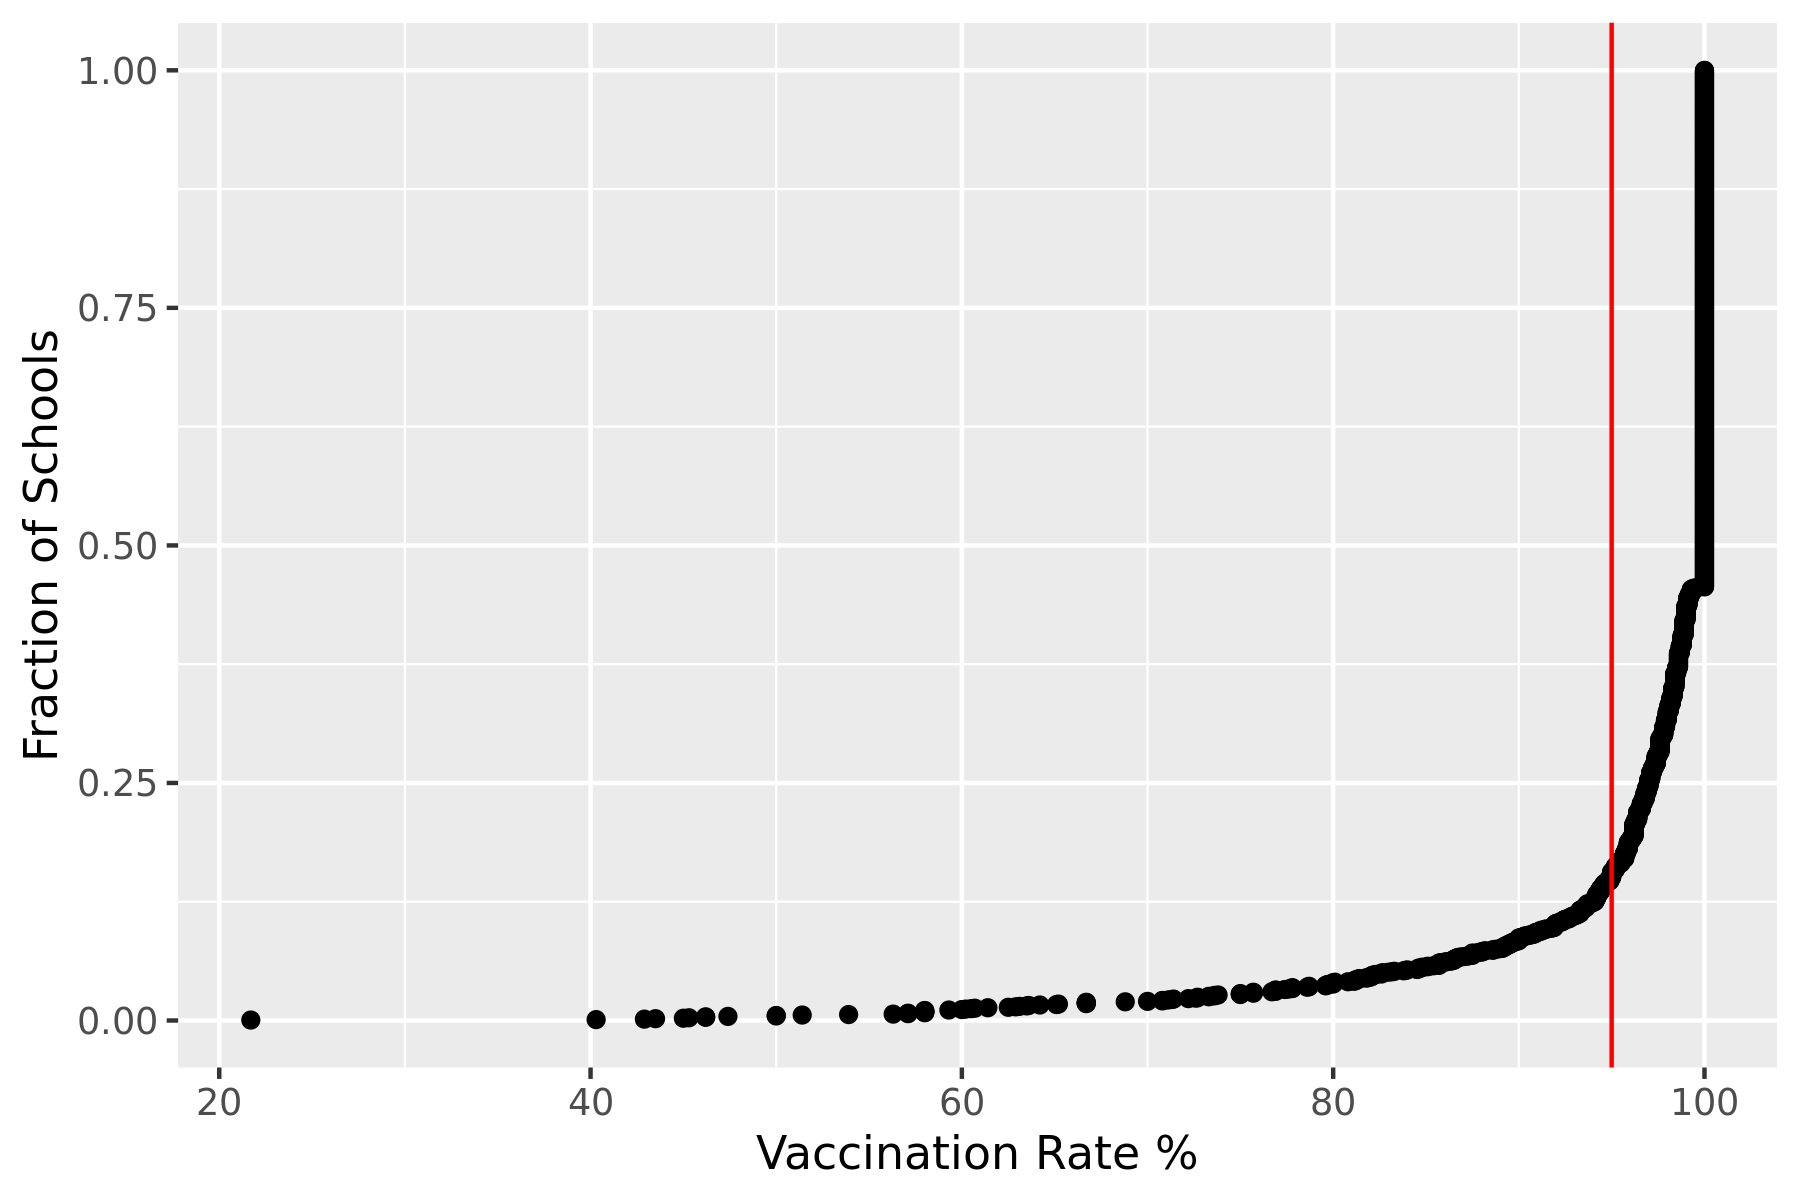

In [37]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 4)

ncvax_ecdf = vaccines.df |> 
    filter(state == 'North Carolina', overall >=0)|> 
    arrange(overall) |> 
    mutate(n = row_number(),
        fraction_of_schools = n / max(n))

p = ggplot(ncvax_ecdf, aes(x = overall, y = fraction_of_schools)) + 
    geom_point() + 
    labs(x = "Vaccination Rate %", y = "Fraction of Schools") + 
    geom_vline(xintercept = 95, color = 'red') 

p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

Yes! The median value on the y axis (0.5) corresponds to a value on the x axis that is above the 95% recommended target.